### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

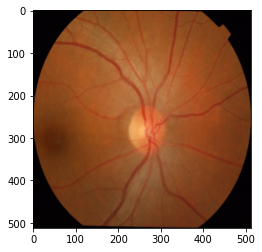

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

(50, 512, 512, 3)


In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
sat_channel_train = convert_to_hsv(1, img_train)
len(sat_channel_train)

50

### Test images

In [5]:
sat_channel_test = convert_to_hsv(1, img_test)
len(sat_channel_test)

51

#### Generator of augmented data:

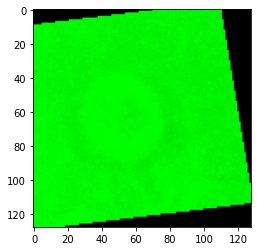

In [6]:
gen = data_generator(sat_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


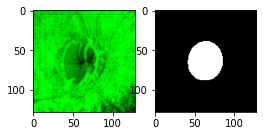

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(sat_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(sat_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_saturation', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 27s 244ms/step - loss: 1.6231 - mean_IOU_gpu: 0.0474 - dice_metric: 0.0885 - val_loss: 1.4510 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 31s 318ms/step - loss: 1.4668 - mean_IOU_gpu: 1.1604e-04 - dice_metric: 2.3167e-04 - val_loss: 1.3908 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 32s 326ms/step - loss: 1.5418 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3538 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 32s 327ms/step - loss: 1.4247 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3567 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 32s 327ms/step - loss: 1.4544 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_lo

99/99 [==============================] - 32s 326ms/step - loss: 0.3493 - mean_IOU_gpu: 0.5186 - dice_metric: 0.6708 - val_loss: 0.8722 - val_mean_IOU_gpu: 0.0562 - val_dice_metric: 0.0928
Epoch 41/500
99/99 [==============================] - 32s 328ms/step - loss: 0.3277 - mean_IOU_gpu: 0.5487 - dice_metric: 0.6921 - val_loss: 0.6694 - val_mean_IOU_gpu: 0.1174 - val_dice_metric: 0.1803
Epoch 42/500
99/99 [==============================] - 32s 327ms/step - loss: 0.4906 - mean_IOU_gpu: 0.4478 - dice_metric: 0.5948 - val_loss: 1.2693 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 43/500
99/99 [==============================] - 33s 330ms/step - loss: 0.3673 - mean_IOU_gpu: 0.4977 - dice_metric: 0.6454 - val_loss: 0.5856 - val_mean_IOU_gpu: 0.1700 - val_dice_metric: 0.2516
Epoch 44/500
99/99 [==============================] - 32s 328ms/step - loss: 0.3176 - mean_IOU_gpu: 0.5485 - dice_metric: 0.6970 - val_loss: 0.6558 - val_mean_IOU_gpu: 0.1235 - val_dice_metric: 0.1905


Epoch 81/500
99/99 [==============================] - 32s 327ms/step - loss: 0.3020 - mean_IOU_gpu: 0.5523 - dice_metric: 0.7006 - val_loss: 0.5710 - val_mean_IOU_gpu: 0.2460 - val_dice_metric: 0.3409
Epoch 82/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2824 - mean_IOU_gpu: 0.5712 - dice_metric: 0.7159 - val_loss: 0.4798 - val_mean_IOU_gpu: 0.3787 - val_dice_metric: 0.4719
Epoch 83/500
99/99 [==============================] - 33s 329ms/step - loss: 0.3432 - mean_IOU_gpu: 0.5314 - dice_metric: 0.6761 - val_loss: 0.5229 - val_mean_IOU_gpu: 0.3034 - val_dice_metric: 0.3993
Epoch 84/500
99/99 [==============================] - 32s 327ms/step - loss: 0.3219 - mean_IOU_gpu: 0.5428 - dice_metric: 0.6880 - val_loss: 0.5084 - val_mean_IOU_gpu: 0.3356 - val_dice_metric: 0.4298
Epoch 85/500
99/99 [==============================] - 32s 328ms/step - loss: 0.3128 - mean_IOU_gpu: 0.5480 - dice_metric: 0.6906 - val_loss: 0.5068 - val_mean_IOU_gpu: 0.3134 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 33s 330ms/step - loss: 0.3593 - mean_IOU_gpu: 0.5749 - dice_metric: 0.7115 - val_loss: 0.5471 - val_mean_IOU_gpu: 0.2952 - val_dice_metric: 0.3884
Epoch 123/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2759 - mean_IOU_gpu: 0.5755 - dice_metric: 0.7187 - val_loss: 0.4030 - val_mean_IOU_gpu: 0.4567 - val_dice_metric: 0.5540
Epoch 124/500
99/99 [==============================] - 32s 327ms/step - loss: 0.3137 - mean_IOU_gpu: 0.5659 - dice_metric: 0.7079 - val_loss: 0.3978 - val_mean_IOU_gpu: 0.4493 - val_dice_metric: 0.5487
Epoch 125/500
99/99 [==============================] - 33s 330ms/step - loss: 0.2590 - mean_IOU_gpu: 0.5874 - dice_metric: 0.7290 - val_loss: 0.3315 - val_mean_IOU_gpu: 0.5692 - val_dice_metric: 0.6757
Epoch 126/500
99/99 [==============================] - 32s 325ms/step - loss: 0.3092 - mean_IOU_gpu: 0.5502 - dice_metric: 0.6952 - val_loss: 0.4476 - val_mean_IOU_gpu: 0.3499 - val_dice_metri

99/99 [==============================] - 32s 327ms/step - loss: 0.2475 - mean_IOU_gpu: 0.5946 - dice_metric: 0.7369 - val_loss: 0.4307 - val_mean_IOU_gpu: 0.4191 - val_dice_metric: 0.5149
Epoch 163/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2564 - mean_IOU_gpu: 0.5906 - dice_metric: 0.7313 - val_loss: 0.3579 - val_mean_IOU_gpu: 0.5726 - val_dice_metric: 0.6820
Epoch 164/500
99/99 [==============================] - 32s 325ms/step - loss: 0.2438 - mean_IOU_gpu: 0.5968 - dice_metric: 0.7401 - val_loss: 0.3966 - val_mean_IOU_gpu: 0.4797 - val_dice_metric: 0.5852
Epoch 165/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2800 - mean_IOU_gpu: 0.5764 - dice_metric: 0.7176 - val_loss: 0.3303 - val_mean_IOU_gpu: 0.5894 - val_dice_metric: 0.7000
Epoch 166/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2684 - mean_IOU_gpu: 0.5869 - dice_metric: 0.7268 - val_loss: 0.3332 - val_mean_IOU_gpu: 0.5904 - val_dice_metric: 0.6978
Epoc

Epoch 203/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2326 - mean_IOU_gpu: 0.6215 - dice_metric: 0.7568 - val_loss: 0.2977 - val_mean_IOU_gpu: 0.5799 - val_dice_metric: 0.6951
Epoch 204/500
99/99 [==============================] - 33s 330ms/step - loss: 0.2250 - mean_IOU_gpu: 0.6266 - dice_metric: 0.7601 - val_loss: 0.3203 - val_mean_IOU_gpu: 0.5551 - val_dice_metric: 0.6759
Epoch 205/500
99/99 [==============================] - 33s 329ms/step - loss: 0.2041 - mean_IOU_gpu: 0.6482 - dice_metric: 0.7785 - val_loss: 0.3300 - val_mean_IOU_gpu: 0.5301 - val_dice_metric: 0.6569
Epoch 206/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2602 - mean_IOU_gpu: 0.5957 - dice_metric: 0.7348 - val_loss: 0.3269 - val_mean_IOU_gpu: 0.5590 - val_dice_metric: 0.6794
Epoch 207/500
99/99 [==============================] - 32s 325ms/step - loss: 0.2722 - mean_IOU_gpu: 0.5875 - dice_metric: 0.7266 - val_loss: 0.3115 - val_mean_IOU_gpu: 0.5857 - val_dice_metri

99/99 [==============================] - 32s 323ms/step - loss: 0.2236 - mean_IOU_gpu: 0.6299 - dice_metric: 0.7623 - val_loss: 0.3316 - val_mean_IOU_gpu: 0.5157 - val_dice_metric: 0.6585
Epoch 244/500
99/99 [==============================] - 33s 328ms/step - loss: 0.2339 - mean_IOU_gpu: 0.6219 - dice_metric: 0.7556 - val_loss: 0.3522 - val_mean_IOU_gpu: 0.5005 - val_dice_metric: 0.6452
Epoch 245/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2080 - mean_IOU_gpu: 0.6402 - dice_metric: 0.7727 - val_loss: 0.4005 - val_mean_IOU_gpu: 0.4530 - val_dice_metric: 0.6031
Epoch 246/500
99/99 [==============================] - 32s 319ms/step - loss: 0.2579 - mean_IOU_gpu: 0.6023 - dice_metric: 0.7374 - val_loss: 0.3097 - val_mean_IOU_gpu: 0.5647 - val_dice_metric: 0.7002
Epoch 247/500
99/99 [==============================] - 33s 328ms/step - loss: 0.2536 - mean_IOU_gpu: 0.6053 - dice_metric: 0.7407 - val_loss: 0.3139 - val_mean_IOU_gpu: 0.5623 - val_dice_metric: 0.6977
Epoc

Epoch 284/500
99/99 [==============================] - 32s 320ms/step - loss: 0.2159 - mean_IOU_gpu: 0.6385 - dice_metric: 0.7696 - val_loss: 0.4455 - val_mean_IOU_gpu: 0.4204 - val_dice_metric: 0.5715
Epoch 285/500
99/99 [==============================] - 33s 328ms/step - loss: 0.2565 - mean_IOU_gpu: 0.6044 - dice_metric: 0.7398 - val_loss: 0.4097 - val_mean_IOU_gpu: 0.4450 - val_dice_metric: 0.5940
Epoch 286/500
99/99 [==============================] - 32s 325ms/step - loss: 0.2340 - mean_IOU_gpu: 0.6187 - dice_metric: 0.7518 - val_loss: 0.3583 - val_mean_IOU_gpu: 0.5030 - val_dice_metric: 0.6434
Epoch 287/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2391 - mean_IOU_gpu: 0.6093 - dice_metric: 0.7474 - val_loss: 0.3683 - val_mean_IOU_gpu: 0.4861 - val_dice_metric: 0.6285
Epoch 288/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2238 - mean_IOU_gpu: 0.6151 - dice_metric: 0.7537 - val_loss: 0.3495 - val_mean_IOU_gpu: 0.5062 - val_dice_metri

99/99 [==============================] - 33s 330ms/step - loss: 0.2318 - mean_IOU_gpu: 0.6107 - dice_metric: 0.7502 - val_loss: 0.3753 - val_mean_IOU_gpu: 0.4777 - val_dice_metric: 0.6178
Epoch 325/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2611 - mean_IOU_gpu: 0.6263 - dice_metric: 0.7589 - val_loss: 0.5204 - val_mean_IOU_gpu: 0.3810 - val_dice_metric: 0.5326
Epoch 326/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2315 - mean_IOU_gpu: 0.6263 - dice_metric: 0.7595 - val_loss: 0.4213 - val_mean_IOU_gpu: 0.4440 - val_dice_metric: 0.5939
Epoch 327/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2268 - mean_IOU_gpu: 0.6304 - dice_metric: 0.7616 - val_loss: 0.3938 - val_mean_IOU_gpu: 0.4632 - val_dice_metric: 0.6104
Epoch 328/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2106 - mean_IOU_gpu: 0.6363 - dice_metric: 0.7695 - val_loss: 0.3915 - val_mean_IOU_gpu: 0.4628 - val_dice_metric: 0.6104
Epoc

Epoch 365/500
99/99 [==============================] - 31s 317ms/step - loss: 0.1996 - mean_IOU_gpu: 0.6479 - dice_metric: 0.7784 - val_loss: 0.3488 - val_mean_IOU_gpu: 0.5064 - val_dice_metric: 0.6495
Epoch 366/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1998 - mean_IOU_gpu: 0.6512 - dice_metric: 0.7808 - val_loss: 0.3899 - val_mean_IOU_gpu: 0.4686 - val_dice_metric: 0.6165
Epoch 367/500
99/99 [==============================] - 32s 319ms/step - loss: 0.2330 - mean_IOU_gpu: 0.6269 - dice_metric: 0.7589 - val_loss: 0.3363 - val_mean_IOU_gpu: 0.5246 - val_dice_metric: 0.6551
Epoch 368/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2100 - mean_IOU_gpu: 0.6430 - dice_metric: 0.7726 - val_loss: 0.3570 - val_mean_IOU_gpu: 0.5025 - val_dice_metric: 0.6460
Epoch 369/500
99/99 [==============================] - 32s 320ms/step - loss: 0.2139 - mean_IOU_gpu: 0.6434 - dice_metric: 0.7726 - val_loss: 0.3588 - val_mean_IOU_gpu: 0.4990 - val_dice_metri

99/99 [==============================] - 32s 321ms/step - loss: 0.1872 - mean_IOU_gpu: 0.6616 - dice_metric: 0.7904 - val_loss: 0.3703 - val_mean_IOU_gpu: 0.4845 - val_dice_metric: 0.6274
Epoch 406/500
99/99 [==============================] - 31s 316ms/step - loss: 0.2028 - mean_IOU_gpu: 0.6572 - dice_metric: 0.7824 - val_loss: 0.3673 - val_mean_IOU_gpu: 0.4867 - val_dice_metric: 0.6284
Epoch 407/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2022 - mean_IOU_gpu: 0.6489 - dice_metric: 0.7785 - val_loss: 0.3957 - val_mean_IOU_gpu: 0.4703 - val_dice_metric: 0.6166
Epoch 408/500
99/99 [==============================] - 31s 313ms/step - loss: 0.1852 - mean_IOU_gpu: 0.6657 - dice_metric: 0.7927 - val_loss: 0.4441 - val_mean_IOU_gpu: 0.4361 - val_dice_metric: 0.5854
Epoch 409/500
99/99 [==============================] - 32s 320ms/step - loss: 0.2148 - mean_IOU_gpu: 0.6444 - dice_metric: 0.7730 - val_loss: 0.3940 - val_mean_IOU_gpu: 0.4699 - val_dice_metric: 0.6147
Epoc

Epoch 446/500
99/99 [==============================] - 31s 317ms/step - loss: 0.2336 - mean_IOU_gpu: 0.6386 - dice_metric: 0.7658 - val_loss: 0.3970 - val_mean_IOU_gpu: 0.4762 - val_dice_metric: 0.6254
Epoch 447/500
99/99 [==============================] - 32s 322ms/step - loss: 0.1928 - mean_IOU_gpu: 0.6606 - dice_metric: 0.7875 - val_loss: 0.4428 - val_mean_IOU_gpu: 0.4267 - val_dice_metric: 0.5805
Epoch 448/500
99/99 [==============================] - 31s 317ms/step - loss: 0.1912 - mean_IOU_gpu: 0.6667 - dice_metric: 0.7908 - val_loss: 0.3289 - val_mean_IOU_gpu: 0.5239 - val_dice_metric: 0.6685
Epoch 449/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1983 - mean_IOU_gpu: 0.6546 - dice_metric: 0.7828 - val_loss: 0.3768 - val_mean_IOU_gpu: 0.4822 - val_dice_metric: 0.6313
Epoch 450/500
99/99 [==============================] - 31s 316ms/step - loss: 0.1739 - mean_IOU_gpu: 0.6842 - dice_metric: 0.8052 - val_loss: 0.3378 - val_mean_IOU_gpu: 0.5132 - val_dice_metri

99/99 [==============================] - 31s 317ms/step - loss: 0.2178 - mean_IOU_gpu: 0.6454 - dice_metric: 0.7721 - val_loss: 0.3577 - val_mean_IOU_gpu: 0.5012 - val_dice_metric: 0.6450
Epoch 487/500
99/99 [==============================] - 32s 318ms/step - loss: 0.1919 - mean_IOU_gpu: 0.6764 - dice_metric: 0.7961 - val_loss: 0.3857 - val_mean_IOU_gpu: 0.4761 - val_dice_metric: 0.6252
Epoch 488/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1775 - mean_IOU_gpu: 0.6813 - dice_metric: 0.8023 - val_loss: 0.4371 - val_mean_IOU_gpu: 0.4321 - val_dice_metric: 0.5842
Epoch 489/500
99/99 [==============================] - 31s 316ms/step - loss: 0.1921 - mean_IOU_gpu: 0.6585 - dice_metric: 0.7865 - val_loss: 0.4001 - val_mean_IOU_gpu: 0.4669 - val_dice_metric: 0.6167
Epoch 490/500
99/99 [==============================] - 31s 317ms/step - loss: 0.2045 - mean_IOU_gpu: 0.6594 - dice_metric: 0.7840 - val_loss: 0.3684 - val_mean_IOU_gpu: 0.4922 - val_dice_metric: 0.6397
Epoc

### Visual check

image #0


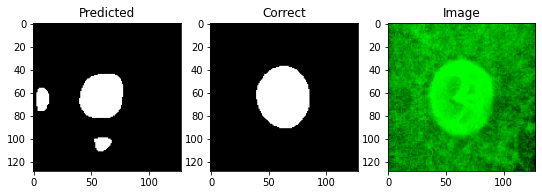

IOU: 0.529463529586792
Dice: 0.6923519263944796
image #1


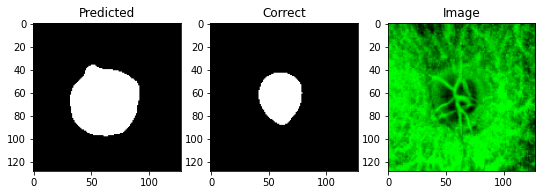

IOU: 0.44985973834991455
Dice: 0.6205562273276904
image #2


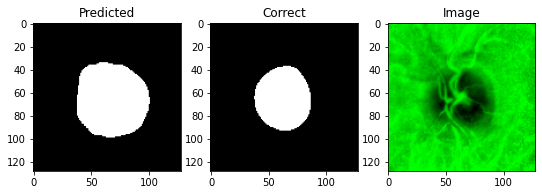

IOU: 0.646898627281189
Dice: 0.7855961785779901
image #3


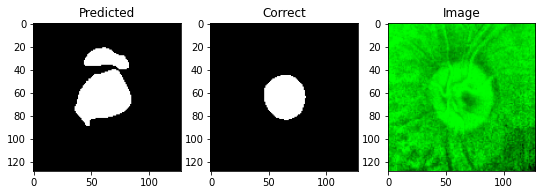

IOU: 0.5031265020370483
Dice: 0.66944
image #4


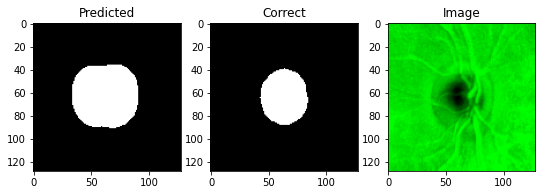

IOU: 0.5836459398269653
Dice: 0.7370914258645191
image #5


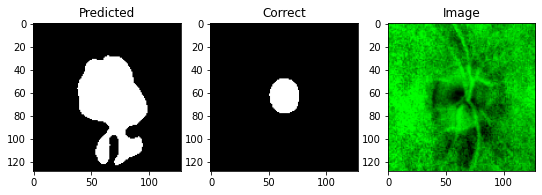

IOU: 0.1772727221250534
Dice: 0.30115830115830117
image #6


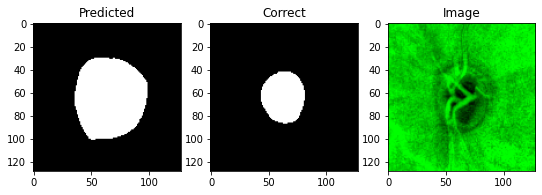

IOU: 0.3729473948478699
Dice: 0.5432799513480641
image #7


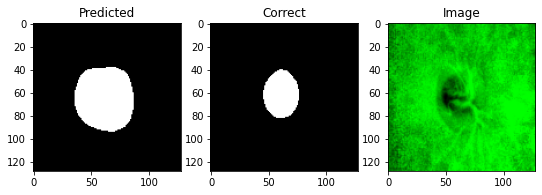

IOU: 0.42505308985710144
Dice: 0.5965435041716329
image #8


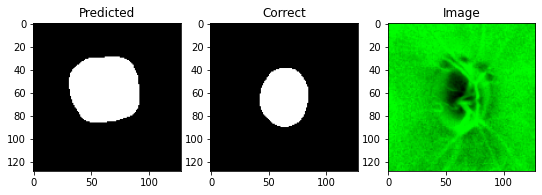

IOU: 0.5375415086746216
Dice: 0.6992221261884183
image #9


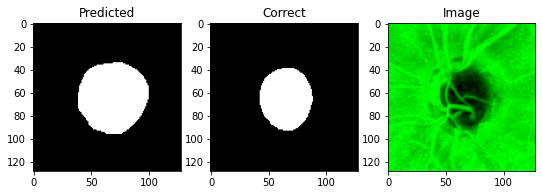

IOU: 0.6525252461433411
Dice: 0.7897310513447433
image #10


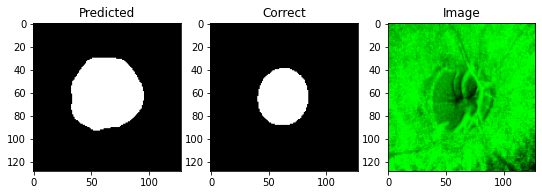

IOU: 0.5465264320373535
Dice: 0.706779311765918
image #11


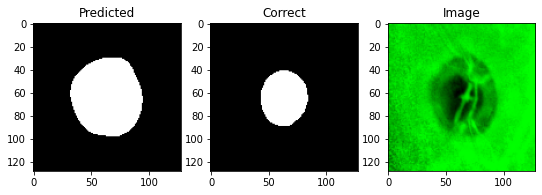

IOU: 0.4573551118373871
Dice: 0.6276508972267537
image #12


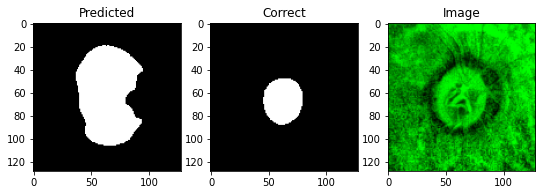

IOU: 0.29110872745513916
Dice: 0.45094378759593445
image #13


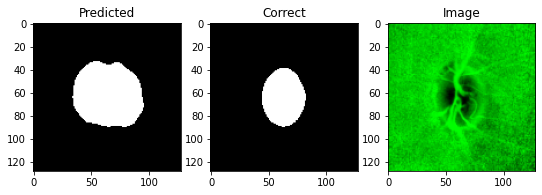

IOU: 0.5220797657966614
Dice: 0.6860084230229293
image #14


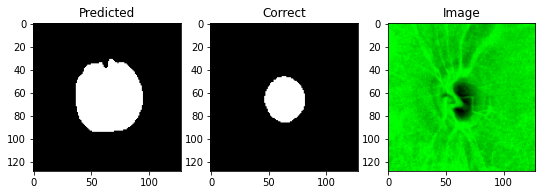

IOU: 0.36289501190185547
Dice: 0.5325355272999253
image #15


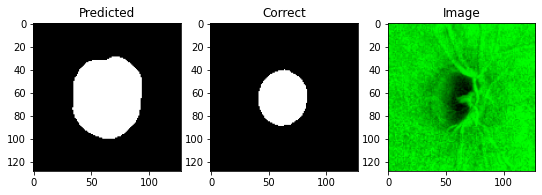

IOU: 0.4633720815181732
Dice: 0.6332936034962257
image #16


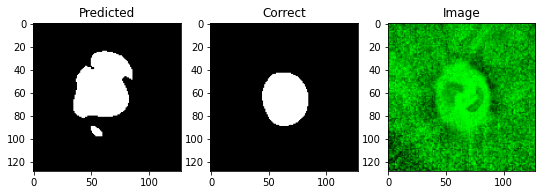

IOU: 0.4570433497428894
Dice: 0.6273572377158034
image #17


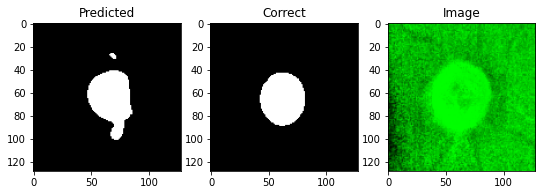

IOU: 0.6510973572731018
Dice: 0.7886843899113838
image #18


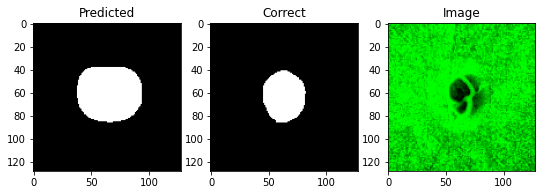

IOU: 0.5585036873817444
Dice: 0.7167178342171365
image #19


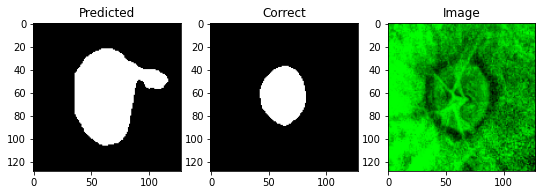

IOU: 0.39330118894577026
Dice: 0.5645601894008377
image #20


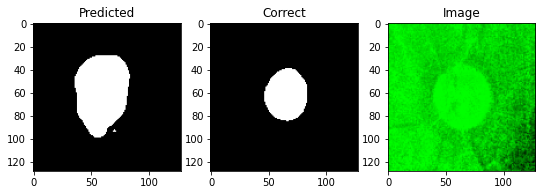

IOU: 0.4764973521232605
Dice: 0.6454428754813863
image #21


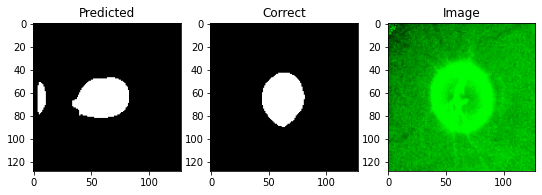

IOU: 0.6424747109413147
Dice: 0.7823252444766389
image #22


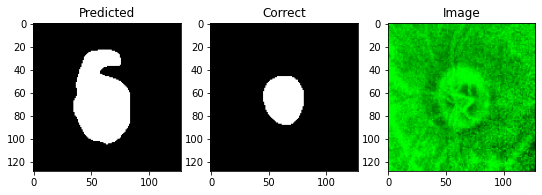

IOU: 0.39479905366897583
Dice: 0.5661016949152542
image #23


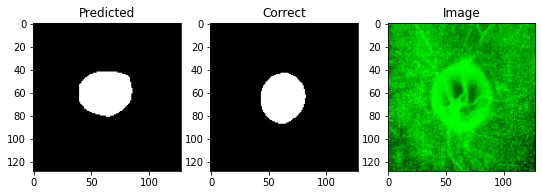

IOU: 0.7071516513824463
Dice: 0.8284579270494763
image #24


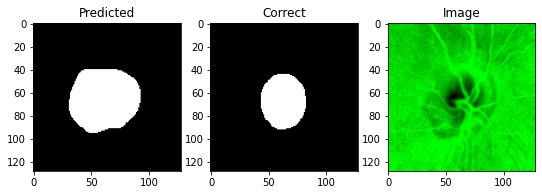

IOU: 0.5430439710617065
Dice: 0.7038606403013182
image #25


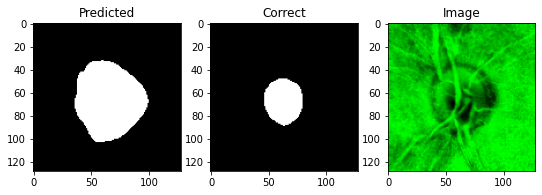

IOU: 0.32361963391304016
Dice: 0.48899188876013905
image #26


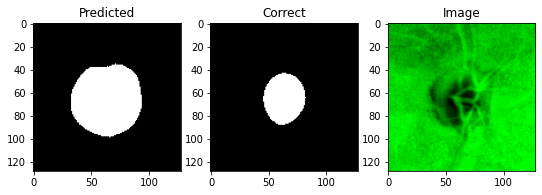

IOU: 0.4066186249256134
Dice: 0.5781504775215467
image #27


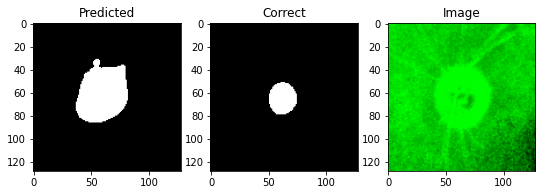

IOU: 0.29334068298339844
Dice: 0.45361702127659576
image #28


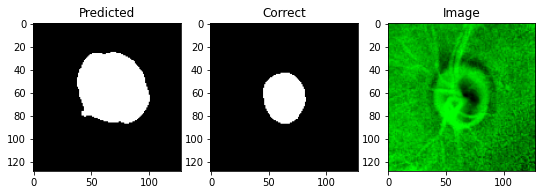

IOU: 0.39903226494789124
Dice: 0.5704403965875029
image #29


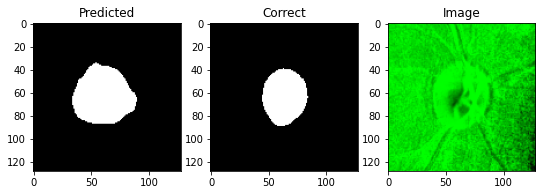

IOU: 0.6712771058082581
Dice: 0.8033103448275862
image #30


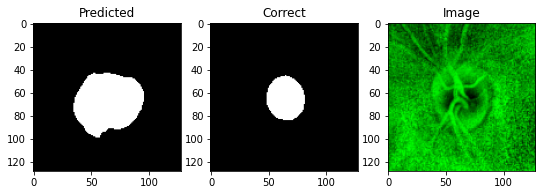

IOU: 0.3991210460662842
Dice: 0.5705311250713878
image #31


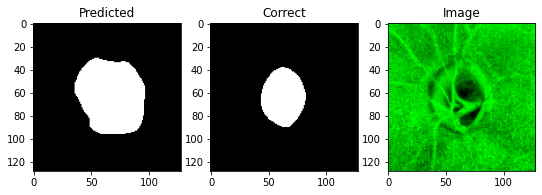

IOU: 0.4725102186203003
Dice: 0.6417751226797525
image #32


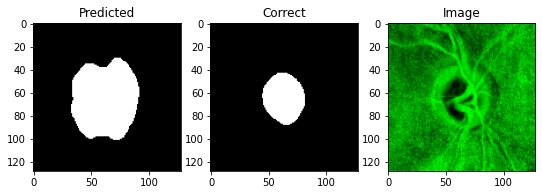

IOU: 0.3792579174041748
Dice: 0.5499448732083793
image #33


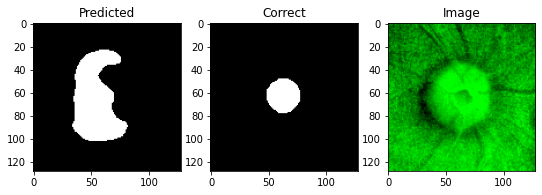

IOU: 0.15959005057811737
Dice: 0.27525252525252525
image #34


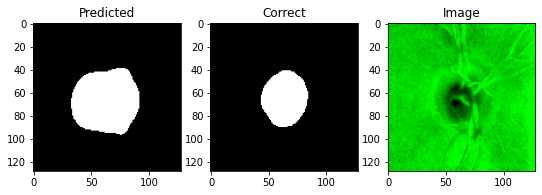

IOU: 0.5574436783790588
Dice: 0.7158444022770398
image #35


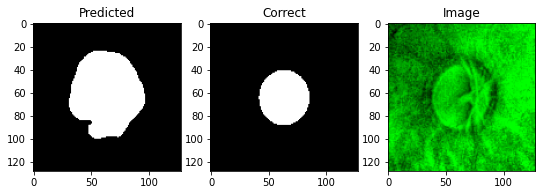

IOU: 0.4432961642742157
Dice: 0.6142830224232146
image #36


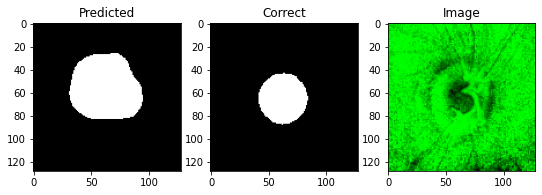

IOU: 0.46056148409843445
Dice: 0.6306636155606408
image #37


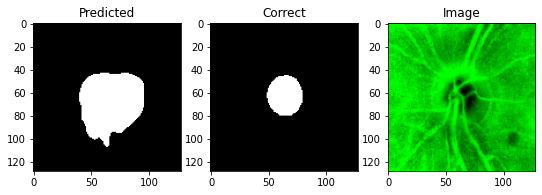

IOU: 0.32556360960006714
Dice: 0.49120784087633323
image #38


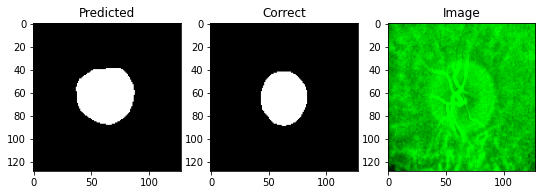

IOU: 0.7412658333778381
Dice: 0.8514102936900262
image #39


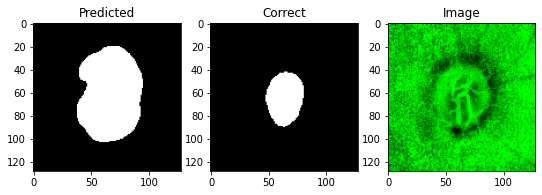

IOU: 0.31674692034721375
Dice: 0.48110524177163755
image #40


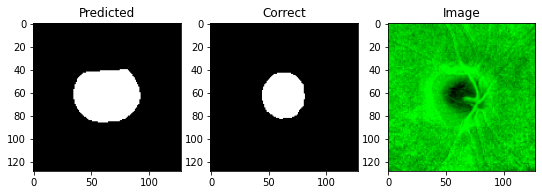

IOU: 0.5393827557563782
Dice: 0.7007779772591263
image #41


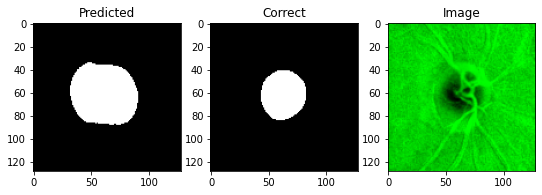

IOU: 0.5151280164718628
Dice: 0.6799795186891961
image #42


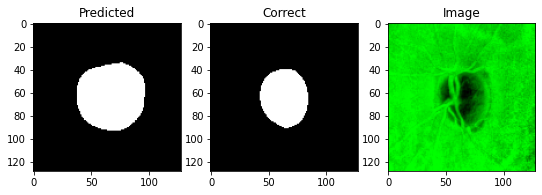

IOU: 0.5928825736045837
Dice: 0.7444146559428061
image #43


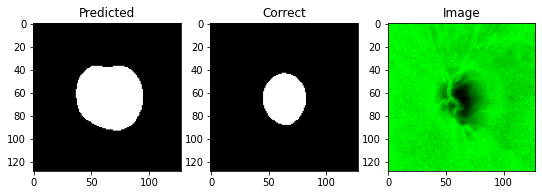

IOU: 0.4866390526294708
Dice: 0.6546835443037975
image #44


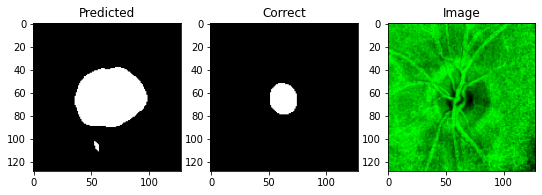

IOU: 0.20189648866653442
Dice: 0.33596318211702825
image #45


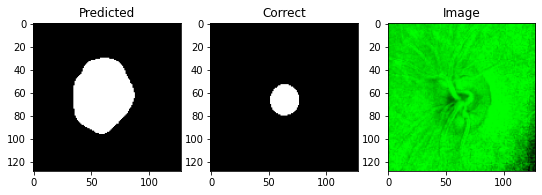

IOU: 0.20429283380508423
Dice: 0.3392743475493316
image #46


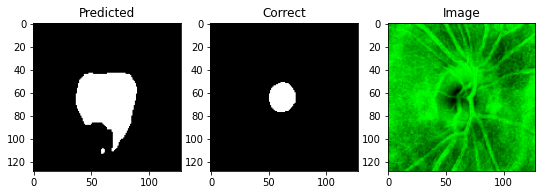

IOU: 0.20206807553768158
Dice: 0.33620071684587816
image #47


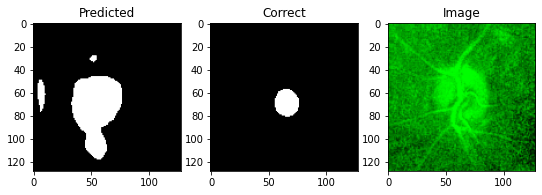

IOU: 0.17442385852336884
Dice: 0.2970373220469411
image #48


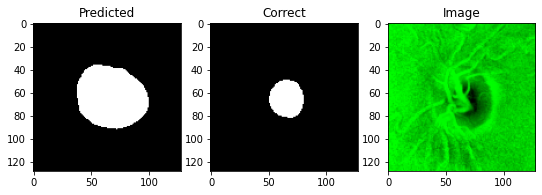

IOU: 0.2896113693714142
Dice: 0.4491451753115039
image #49


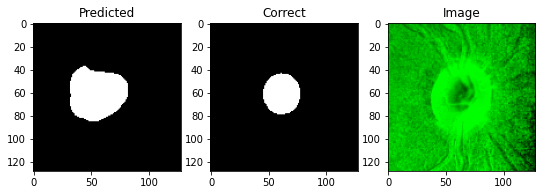

IOU: 0.49125683307647705
Dice: 0.6588493953829242
image #50


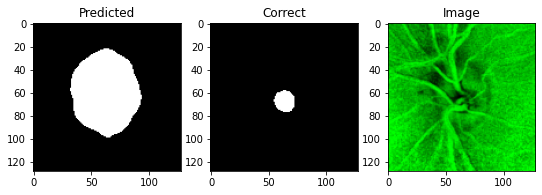

IOU: 0.0764995664358139
Dice: 0.14212651413189772


In [9]:
pred_iou, pred_dice, pred_cup = predict(sat_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.44056687
0.5951111925023039


### Training and Test disc

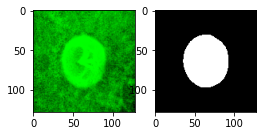

In [11]:
X_test, Z_test = next(data_generator(sat_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
history_disc = train(sat_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_saturation', 
                     model, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 27s 271ms/step - loss: 0.1217 - mean_IOU_gpu: 0.7507 - dice_metric: 0.8536 - val_loss: 0.3817 - val_mean_IOU_gpu: 0.4592 - val_dice_metric: 0.6219
Epoch 2/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0942 - mean_IOU_gpu: 0.7960 - dice_metric: 0.8843 - val_loss: 0.3343 - val_mean_IOU_gpu: 0.4954 - val_dice_metric: 0.6564
Epoch 3/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0952 - mean_IOU_gpu: 0.7929 - dice_metric: 0.8825 - val_loss: 0.2977 - val_mean_IOU_gpu: 0.5234 - val_dice_metric: 0.6816
Epoch 4/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1005 - mean_IOU_gpu: 0.7837 - dice_metric: 0.8768 - val_loss: 0.2606 - val_mean_IOU_gpu: 0.5596 - val_dice_metric: 0.7122
Epoch 5/500
99/99 [==============================] - 31s 316ms/step - loss: 0.1022 - mean_IOU_gpu: 0.7794 - dice_metric: 0.8740 - val_loss: 0.2511 - val_mean_IOU_gpu: 0.5677 - val_dice_metric: 0.7192


Epoch 42/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0912 - mean_IOU_gpu: 0.8040 - dice_metric: 0.8891 - val_loss: 0.2612 - val_mean_IOU_gpu: 0.5558 - val_dice_metric: 0.7118
Epoch 43/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0932 - mean_IOU_gpu: 0.7995 - dice_metric: 0.8865 - val_loss: 0.2444 - val_mean_IOU_gpu: 0.5716 - val_dice_metric: 0.7247
Epoch 44/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0907 - mean_IOU_gpu: 0.8015 - dice_metric: 0.8879 - val_loss: 0.2539 - val_mean_IOU_gpu: 0.5616 - val_dice_metric: 0.7166
Epoch 45/500
99/99 [==============================] - 32s 323ms/step - loss: 0.0836 - mean_IOU_gpu: 0.8147 - dice_metric: 0.8960 - val_loss: 0.2762 - val_mean_IOU_gpu: 0.5412 - val_dice_metric: 0.6997
Epoch 46/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0893 - mean_IOU_gpu: 0.8086 - dice_metric: 0.8918 - val_loss: 0.2656 - val_mean_IOU_gpu: 0.5507 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0832 - mean_IOU_gpu: 0.8186 - dice_metric: 0.8984 - val_loss: 0.3373 - val_mean_IOU_gpu: 0.4932 - val_dice_metric: 0.6581
Epoch 84/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0924 - mean_IOU_gpu: 0.8000 - dice_metric: 0.8868 - val_loss: 0.3150 - val_mean_IOU_gpu: 0.5106 - val_dice_metric: 0.6736
Epoch 85/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0865 - mean_IOU_gpu: 0.8103 - dice_metric: 0.8932 - val_loss: 0.3169 - val_mean_IOU_gpu: 0.5083 - val_dice_metric: 0.6715
Epoch 86/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0874 - mean_IOU_gpu: 0.8078 - dice_metric: 0.8918 - val_loss: 0.2971 - val_mean_IOU_gpu: 0.5262 - val_dice_metric: 0.6870
Epoch 87/500
99/99 [==============================] - 31s 315ms/step - loss: 0.0887 - mean_IOU_gpu: 0.8078 - dice_metric: 0.8913 - val_loss: 0.2678 - val_mean_IOU_gpu: 0.5529 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 31s 319ms/step - loss: 0.0814 - mean_IOU_gpu: 0.8198 - dice_metric: 0.8993 - val_loss: 0.2633 - val_mean_IOU_gpu: 0.5603 - val_dice_metric: 0.7155
Epoch 125/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0747 - mean_IOU_gpu: 0.8334 - dice_metric: 0.9073 - val_loss: 0.2648 - val_mean_IOU_gpu: 0.5600 - val_dice_metric: 0.7152
Epoch 126/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0886 - mean_IOU_gpu: 0.8061 - dice_metric: 0.8905 - val_loss: 0.2974 - val_mean_IOU_gpu: 0.5291 - val_dice_metric: 0.6893
Epoch 127/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0802 - mean_IOU_gpu: 0.8223 - dice_metric: 0.9008 - val_loss: 0.3037 - val_mean_IOU_gpu: 0.5238 - val_dice_metric: 0.6847
Epoch 128/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0879 - mean_IOU_gpu: 0.8070 - dice_metric: 0.8914 - val_loss: 0.2811 - val_mean_IOU_gpu: 0.5438 - val_dice_metri

99/99 [==============================] - 31s 318ms/step - loss: 0.0743 - mean_IOU_gpu: 0.8321 - dice_metric: 0.9068 - val_loss: 0.2484 - val_mean_IOU_gpu: 0.5777 - val_dice_metric: 0.7296
Epoch 165/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0771 - mean_IOU_gpu: 0.8289 - dice_metric: 0.9047 - val_loss: 0.2514 - val_mean_IOU_gpu: 0.5762 - val_dice_metric: 0.7283
Epoch 166/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0876 - mean_IOU_gpu: 0.8129 - dice_metric: 0.8939 - val_loss: 0.2999 - val_mean_IOU_gpu: 0.5278 - val_dice_metric: 0.6882
Epoch 167/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0791 - mean_IOU_gpu: 0.8237 - dice_metric: 0.9018 - val_loss: 0.2861 - val_mean_IOU_gpu: 0.5387 - val_dice_metric: 0.6975
Epoch 168/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0771 - mean_IOU_gpu: 0.8279 - dice_metric: 0.9043 - val_loss: 0.2874 - val_mean_IOU_gpu: 0.5383 - val_dice_metric: 0.6973
Epoc

Epoch 205/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0810 - mean_IOU_gpu: 0.8188 - dice_metric: 0.8988 - val_loss: 0.3141 - val_mean_IOU_gpu: 0.5185 - val_dice_metric: 0.6800
Epoch 206/500
99/99 [==============================] - 31s 315ms/step - loss: 0.0799 - mean_IOU_gpu: 0.8201 - dice_metric: 0.8999 - val_loss: 0.3445 - val_mean_IOU_gpu: 0.4930 - val_dice_metric: 0.6577
Epoch 207/500
99/99 [==============================] - 31s 319ms/step - loss: 0.0779 - mean_IOU_gpu: 0.8246 - dice_metric: 0.9022 - val_loss: 0.3065 - val_mean_IOU_gpu: 0.5255 - val_dice_metric: 0.6861
Epoch 208/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0833 - mean_IOU_gpu: 0.8195 - dice_metric: 0.8986 - val_loss: 0.3198 - val_mean_IOU_gpu: 0.5153 - val_dice_metric: 0.6773
Epoch 209/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0745 - mean_IOU_gpu: 0.8299 - dice_metric: 0.9057 - val_loss: 0.3030 - val_mean_IOU_gpu: 0.5293 - val_dice_metri

99/99 [==============================] - 31s 317ms/step - loss: 0.0757 - mean_IOU_gpu: 0.8316 - dice_metric: 0.9066 - val_loss: 0.3167 - val_mean_IOU_gpu: 0.5196 - val_dice_metric: 0.6808
Epoch 246/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0801 - mean_IOU_gpu: 0.8258 - dice_metric: 0.9024 - val_loss: 0.3864 - val_mean_IOU_gpu: 0.4671 - val_dice_metric: 0.6343
Epoch 247/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0791 - mean_IOU_gpu: 0.8235 - dice_metric: 0.9013 - val_loss: 0.3092 - val_mean_IOU_gpu: 0.5263 - val_dice_metric: 0.6866
Epoch 248/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0789 - mean_IOU_gpu: 0.8244 - dice_metric: 0.9022 - val_loss: 0.2767 - val_mean_IOU_gpu: 0.5566 - val_dice_metric: 0.7119
Epoch 249/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0743 - mean_IOU_gpu: 0.8331 - dice_metric: 0.9073 - val_loss: 0.2826 - val_mean_IOU_gpu: 0.5522 - val_dice_metric: 0.7081
Epoc

Epoch 286/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0768 - mean_IOU_gpu: 0.8271 - dice_metric: 0.9038 - val_loss: 0.3141 - val_mean_IOU_gpu: 0.5290 - val_dice_metric: 0.6885
Epoch 287/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0725 - mean_IOU_gpu: 0.8361 - dice_metric: 0.9092 - val_loss: 0.3158 - val_mean_IOU_gpu: 0.5276 - val_dice_metric: 0.6874
Epoch 288/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0717 - mean_IOU_gpu: 0.8374 - dice_metric: 0.9102 - val_loss: 0.2941 - val_mean_IOU_gpu: 0.5479 - val_dice_metric: 0.7046
Epoch 289/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0753 - mean_IOU_gpu: 0.8300 - dice_metric: 0.9057 - val_loss: 0.2671 - val_mean_IOU_gpu: 0.5744 - val_dice_metric: 0.7262
Epoch 290/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0746 - mean_IOU_gpu: 0.8331 - dice_metric: 0.9074 - val_loss: 0.2878 - val_mean_IOU_gpu: 0.5540 - val_dice_metri

99/99 [==============================] - 32s 323ms/step - loss: 0.0718 - mean_IOU_gpu: 0.8380 - dice_metric: 0.9104 - val_loss: 0.2632 - val_mean_IOU_gpu: 0.5809 - val_dice_metric: 0.7310
Epoch 327/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0813 - mean_IOU_gpu: 0.8244 - dice_metric: 0.9013 - val_loss: 0.3064 - val_mean_IOU_gpu: 0.5407 - val_dice_metric: 0.6985
Epoch 328/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0720 - mean_IOU_gpu: 0.8407 - dice_metric: 0.9118 - val_loss: 0.2815 - val_mean_IOU_gpu: 0.5637 - val_dice_metric: 0.7173
Epoch 329/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0763 - mean_IOU_gpu: 0.8305 - dice_metric: 0.9055 - val_loss: 0.2765 - val_mean_IOU_gpu: 0.5701 - val_dice_metric: 0.7225
Epoch 330/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0779 - mean_IOU_gpu: 0.8271 - dice_metric: 0.9036 - val_loss: 0.2981 - val_mean_IOU_gpu: 0.5491 - val_dice_metric: 0.7055
Epoc

Epoch 367/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0719 - mean_IOU_gpu: 0.8396 - dice_metric: 0.9110 - val_loss: 0.2707 - val_mean_IOU_gpu: 0.5759 - val_dice_metric: 0.7267
Epoch 368/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0826 - mean_IOU_gpu: 0.8188 - dice_metric: 0.8984 - val_loss: 0.2430 - val_mean_IOU_gpu: 0.6034 - val_dice_metric: 0.7486
Epoch 369/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0715 - mean_IOU_gpu: 0.8400 - dice_metric: 0.9116 - val_loss: 0.2414 - val_mean_IOU_gpu: 0.6078 - val_dice_metric: 0.7519
Epoch 370/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0706 - mean_IOU_gpu: 0.8400 - dice_metric: 0.9116 - val_loss: 0.2440 - val_mean_IOU_gpu: 0.6032 - val_dice_metric: 0.7483
Epoch 371/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0741 - mean_IOU_gpu: 0.8352 - dice_metric: 0.9086 - val_loss: 0.2562 - val_mean_IOU_gpu: 0.5913 - val_dice_metri

99/99 [==============================] - 32s 320ms/step - loss: 0.0726 - mean_IOU_gpu: 0.8388 - dice_metric: 0.9106 - val_loss: 0.2798 - val_mean_IOU_gpu: 0.5673 - val_dice_metric: 0.7196
Epoch 408/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0702 - mean_IOU_gpu: 0.8437 - dice_metric: 0.9137 - val_loss: 0.2678 - val_mean_IOU_gpu: 0.5808 - val_dice_metric: 0.7305
Epoch 409/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0752 - mean_IOU_gpu: 0.8348 - dice_metric: 0.9083 - val_loss: 0.2855 - val_mean_IOU_gpu: 0.5629 - val_dice_metric: 0.7158
Epoch 410/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0675 - mean_IOU_gpu: 0.8458 - dice_metric: 0.9153 - val_loss: 0.2734 - val_mean_IOU_gpu: 0.5754 - val_dice_metric: 0.7257
Epoch 411/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0809 - mean_IOU_gpu: 0.8233 - dice_metric: 0.9012 - val_loss: 0.2768 - val_mean_IOU_gpu: 0.5705 - val_dice_metric: 0.7220
Epoc

Epoch 448/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0665 - mean_IOU_gpu: 0.8504 - dice_metric: 0.9177 - val_loss: 0.2949 - val_mean_IOU_gpu: 0.5560 - val_dice_metric: 0.7100
Epoch 449/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0681 - mean_IOU_gpu: 0.8471 - dice_metric: 0.9156 - val_loss: 0.2404 - val_mean_IOU_gpu: 0.6082 - val_dice_metric: 0.7519
Epoch 450/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0699 - mean_IOU_gpu: 0.8418 - dice_metric: 0.9129 - val_loss: 0.2404 - val_mean_IOU_gpu: 0.6108 - val_dice_metric: 0.7536
Epoch 451/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0674 - mean_IOU_gpu: 0.8459 - dice_metric: 0.9153 - val_loss: 0.2234 - val_mean_IOU_gpu: 0.6309 - val_dice_metric: 0.7690
Epoch 452/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0653 - mean_IOU_gpu: 0.8522 - dice_metric: 0.9188 - val_loss: 0.2364 - val_mean_IOU_gpu: 0.6160 - val_dice_metri

99/99 [==============================] - 32s 318ms/step - loss: 0.0664 - mean_IOU_gpu: 0.8487 - dice_metric: 0.9167 - val_loss: 0.2345 - val_mean_IOU_gpu: 0.6111 - val_dice_metric: 0.7539
Epoch 489/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0784 - mean_IOU_gpu: 0.8280 - dice_metric: 0.9041 - val_loss: 0.2162 - val_mean_IOU_gpu: 0.6310 - val_dice_metric: 0.7690
Epoch 490/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0671 - mean_IOU_gpu: 0.8481 - dice_metric: 0.9165 - val_loss: 0.2424 - val_mean_IOU_gpu: 0.6024 - val_dice_metric: 0.7468
Epoch 491/500
99/99 [==============================] - 32s 318ms/step - loss: 0.0662 - mean_IOU_gpu: 0.8490 - dice_metric: 0.9171 - val_loss: 0.2434 - val_mean_IOU_gpu: 0.6034 - val_dice_metric: 0.7480
Epoch 492/500
99/99 [==============================] - 32s 323ms/step - loss: 0.0666 - mean_IOU_gpu: 0.8491 - dice_metric: 0.9172 - val_loss: 0.2305 - val_mean_IOU_gpu: 0.6157 - val_dice_metric: 0.7574
Epoc

image #0


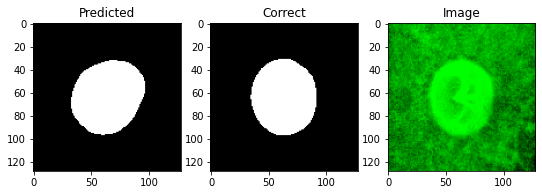

IOU: 0.8627510666847229
Dice: 0.9263192288841693
image #1


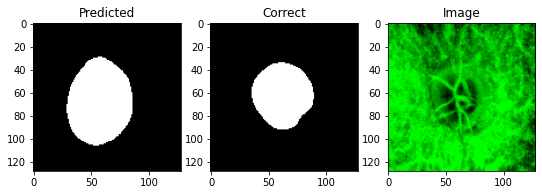

IOU: 0.6398723125457764
Dice: 0.7803928508228632
image #2


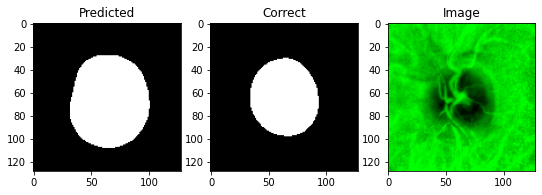

IOU: 0.7086241841316223
Dice: 0.8294675803900896
image #3


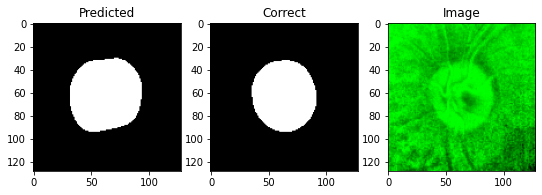

IOU: 0.8227963447570801
Dice: 0.9027847256961814
image #4


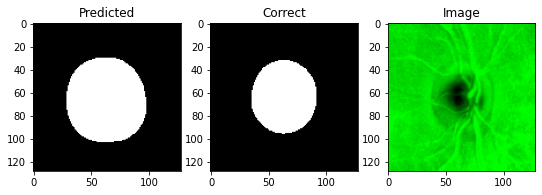

IOU: 0.6884689927101135
Dice: 0.8154949784791966
image #5


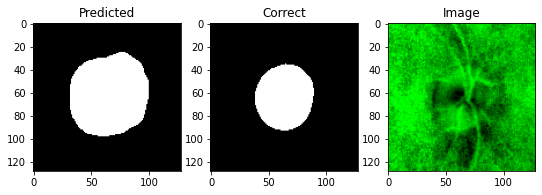

IOU: 0.5726088881492615
Dice: 0.7282279891736985
image #6


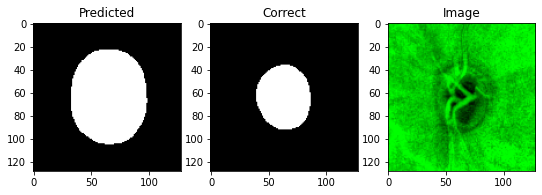

IOU: 0.4733499586582184
Dice: 0.6425492610837439
image #7


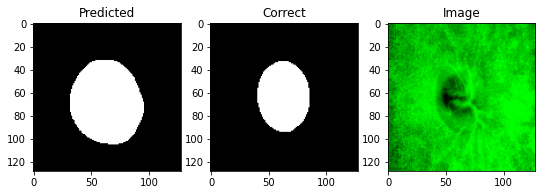

IOU: 0.5989568829536438
Dice: 0.7491845493562231
image #8


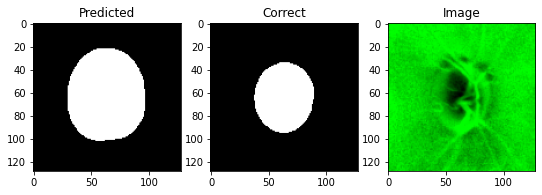

IOU: 0.5595454573631287
Dice: 0.7175750510055378
image #9


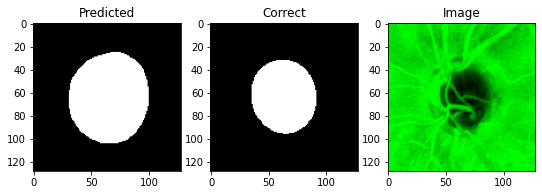

IOU: 0.6547920107841492
Dice: 0.7913888888888889
image #10


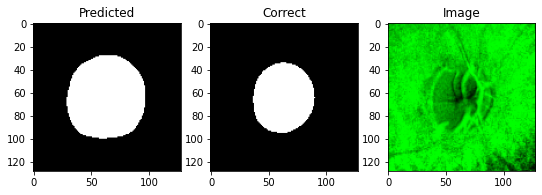

IOU: 0.6415473222732544
Dice: 0.781637337413925
image #11


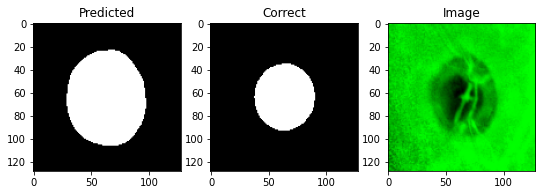

IOU: 0.5230328440666199
Dice: 0.6868306801736613
image #12


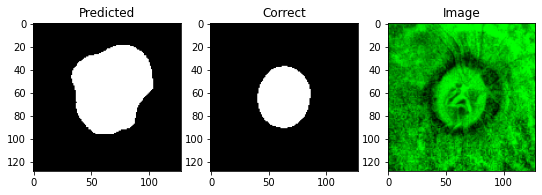

IOU: 0.47315269708633423
Dice: 0.6423674970740679
image #13


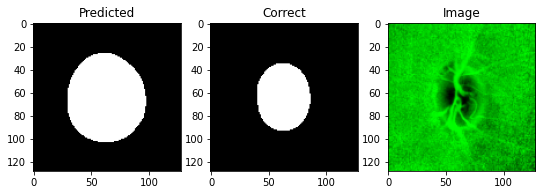

IOU: 0.5191059708595276
Dice: 0.68343616516374
image #14


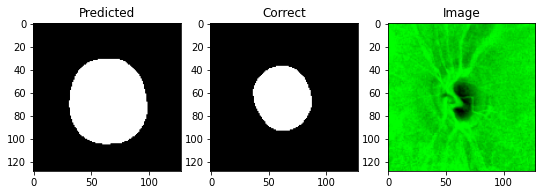

IOU: 0.5420354008674622
Dice: 0.703012912482066
image #15


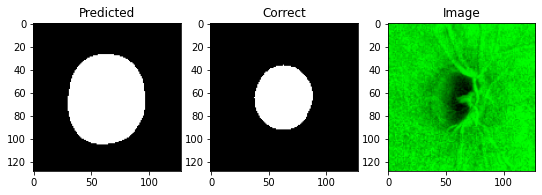

IOU: 0.5136150121688843
Dice: 0.6786600496277916
image #16


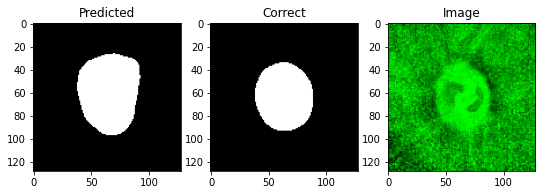

IOU: 0.7652060389518738
Dice: 0.8669877732493516
image #17


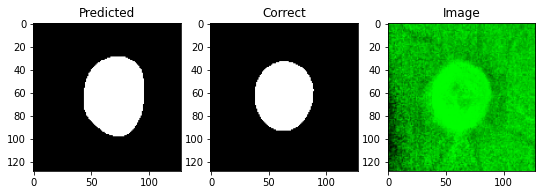

IOU: 0.6852438449859619
Dice: 0.813228109733183
image #18


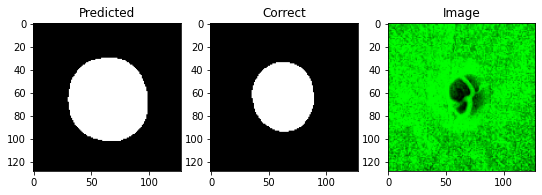

IOU: 0.6328862309455872
Dice: 0.7751749315485245
image #19


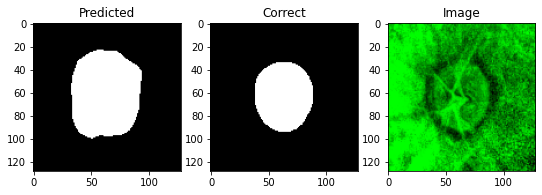

IOU: 0.6306935548782349
Dice: 0.7735280114267576
image #20


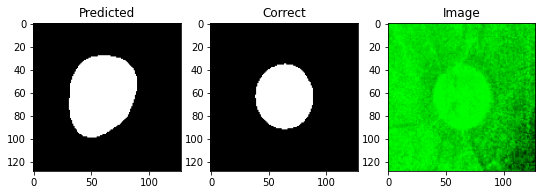

IOU: 0.6327683329582214
Dice: 0.7750865051903114
image #21


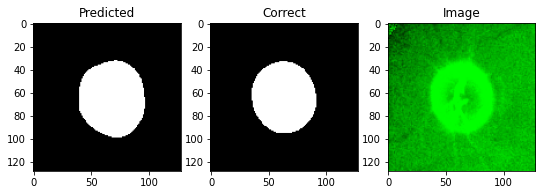

IOU: 0.7947040796279907
Dice: 0.8856101371289706
image #22


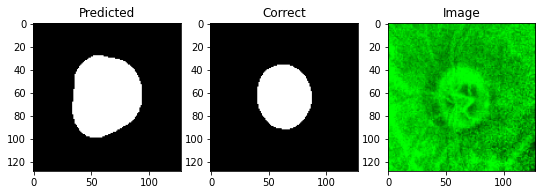

IOU: 0.6117302179336548
Dice: 0.7590975254730713
image #23


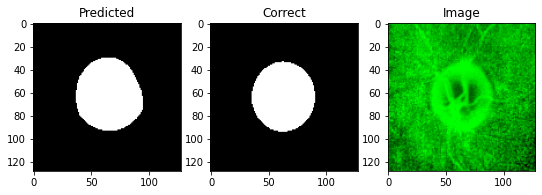

IOU: 0.8659617900848389
Dice: 0.9281666971303235
image #24


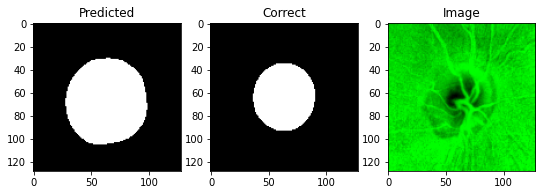

IOU: 0.5883329510688782
Dice: 0.7408181546730367
image #25


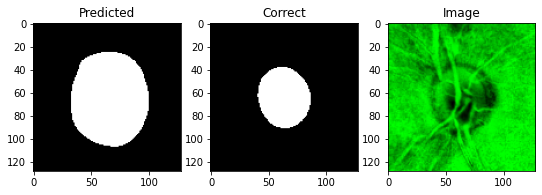

IOU: 0.42143017053604126
Dice: 0.5929664090837408
image #26


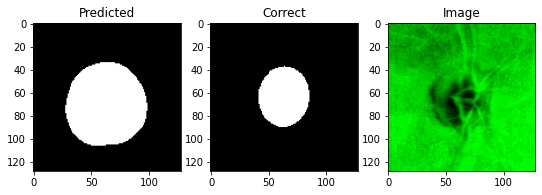

IOU: 0.44562268257141113
Dice: 0.6165131354486524
image #27


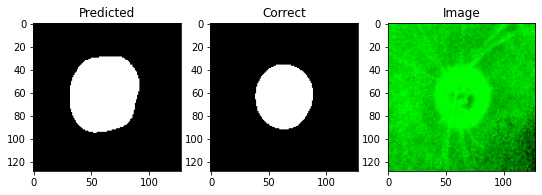

IOU: 0.6759999990463257
Dice: 0.8066825775656324
image #28


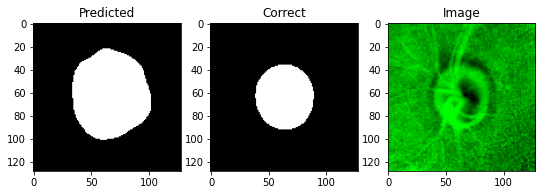

IOU: 0.5421280860900879
Dice: 0.7030908523259445
image #29


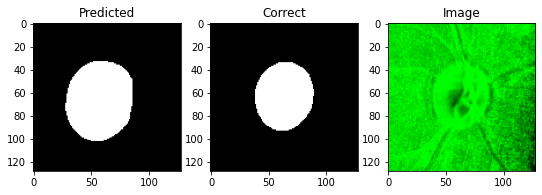

IOU: 0.6750373840332031
Dice: 0.8059967874353026
image #30


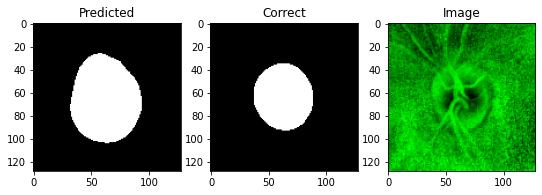

IOU: 0.637803852558136
Dice: 0.7788525683789193
image #31


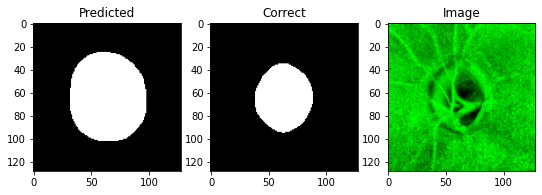

IOU: 0.5427004098892212
Dice: 0.7035719808257306
image #32


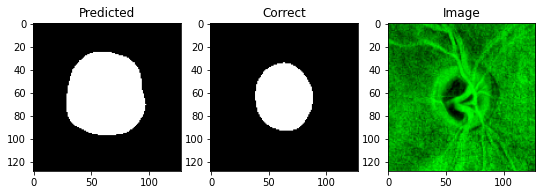

IOU: 0.5697299838066101
Dice: 0.7258955341644311
image #33


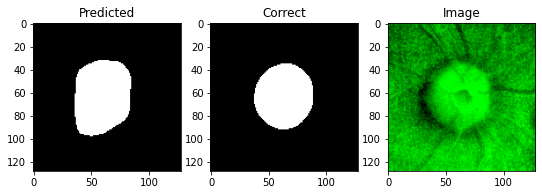

IOU: 0.748155951499939
Dice: 0.8559373116335142
image #34


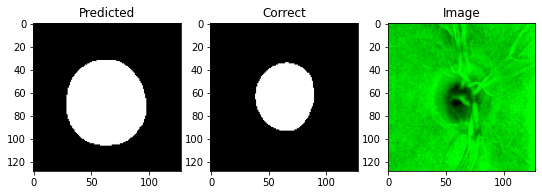

IOU: 0.5728179216384888
Dice: 0.7283969701654043
image #35


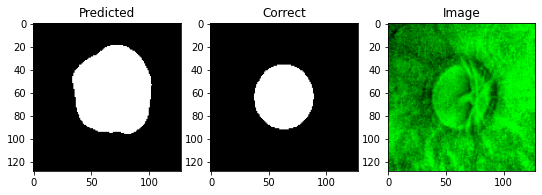

IOU: 0.5412470102310181
Dice: 0.7023494632021161
image #36


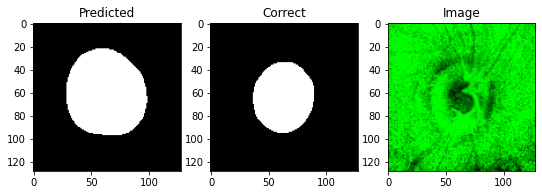

IOU: 0.6047449707984924
Dice: 0.7536960378474276
image #37


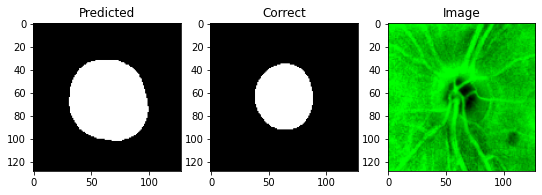

IOU: 0.5859757661819458
Dice: 0.7389466840052016
image #38


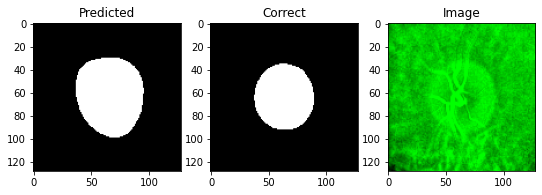

IOU: 0.7190388441085815
Dice: 0.8365591397849462
image #39


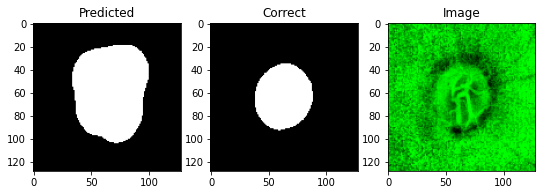

IOU: 0.49666517972946167
Dice: 0.6636957813428401
image #40


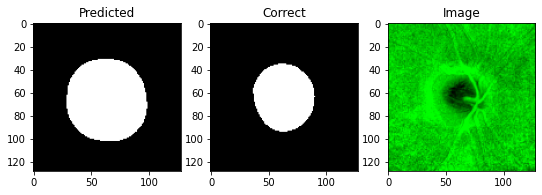

IOU: 0.6017852425575256
Dice: 0.7513931888544891
image #41


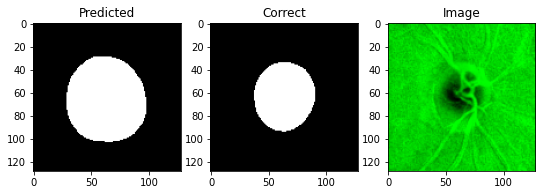

IOU: 0.6025765538215637
Dice: 0.7520097072652814
image #42


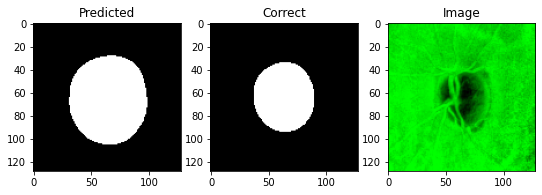

IOU: 0.6031669974327087
Dice: 0.7524693205627058
image #43


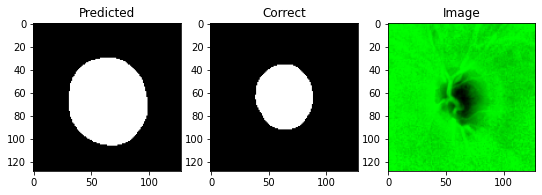

IOU: 0.531212329864502
Dice: 0.6938454273571542
image #44


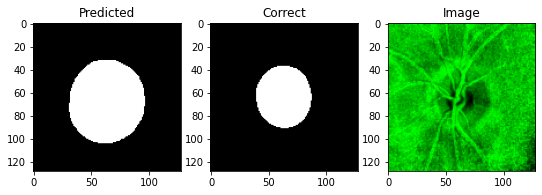

IOU: 0.5415009260177612
Dice: 0.7025632203681403
image #45


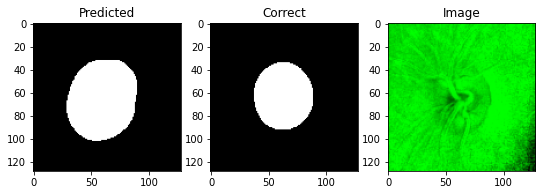

IOU: 0.6900669932365417
Dice: 0.8166149603584971
image #46


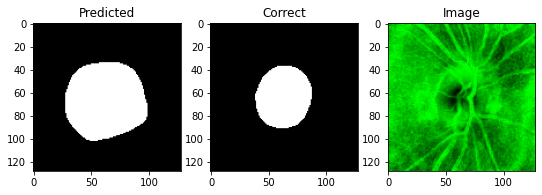

IOU: 0.5419906973838806
Dice: 0.7029752899646999
image #47


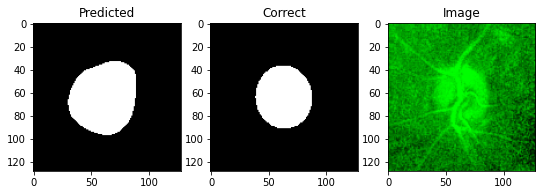

IOU: 0.7119565010070801
Dice: 0.8317460317460318
image #48


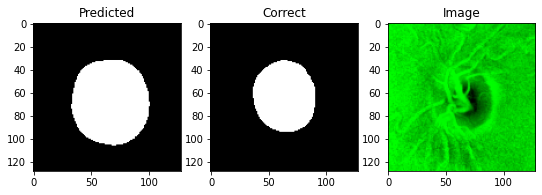

IOU: 0.6631841063499451
Dice: 0.7974872868680826
image #49


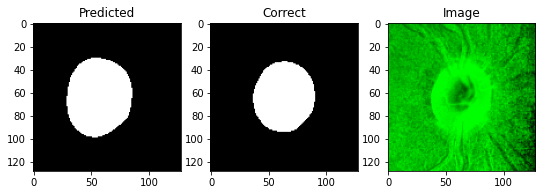

IOU: 0.6984365582466125
Dice: 0.8224464506992388
image #50


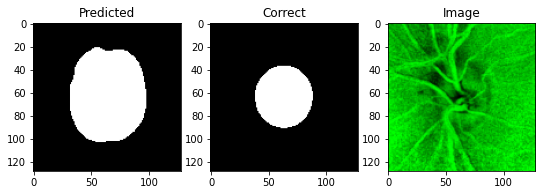

IOU: 0.47516295313835144
Dice: 0.6442175834222155


In [13]:
pred_iou, pred_dice, pred_disc = predict(sat_channel_test, X_test, Z_test, model, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.61650825
0.7579989665087395


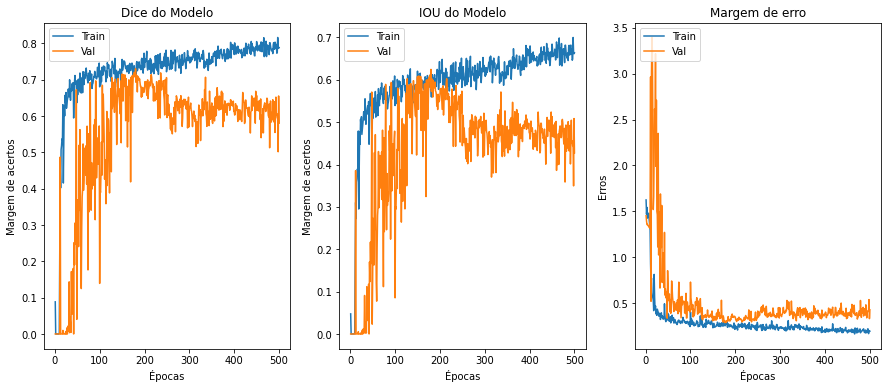

In [20]:
plot_results(history_cup, epochs)

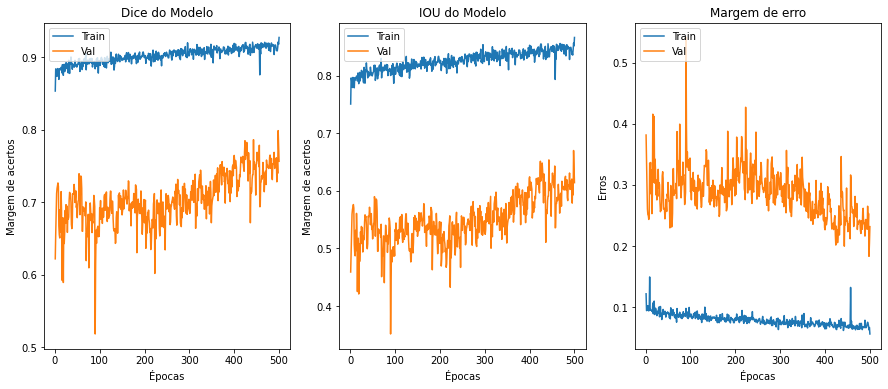

In [19]:
plot_results(history_disc, epochs)

In [21]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)


image #0 - cdr = 0.602636459494392
image #1 - cdr = 0.8077207090762111
image #2 - cdr = 0.8217407796818588
image #3 - cdr = 0.7813446102480278
image #4 - cdr = 0.7947166228848748
image #5 - cdr = 1.221058312039192
image #6 - cdr = 0.865729744079759
image #7 - cdr = 0.7770249469588162
image #8 - cdr = 0.7729729346815271
image #9 - cdr = 0.7895834025471515
image #10 - cdr = 0.8802373566993429
image #11 - cdr = 0.8288963519312328
image #12 - cdr = 1.1432378631280689
image #13 - cdr = 0.8253015870735987
image #14 - cdr = 0.8267872404743947
image #15 - cdr = 0.899671253170768
image #16 - cdr = 0.6953236158661905
image #17 - cdr = 0.8289464442331386
image #18 - cdr = 0.7958481364139451
image #19 - cdr = 1.0585253836028563
image #20 - cdr = 0.9718357442683481
image #21 - cdr = 0.7316872811804593
image #22 - cdr = 1.1389883612573402
image #23 - cdr = 0.7444579176943152
image #24 - cdr = 0.839027538678708
image #25 - cdr = 0.8333079525291568
image #26 - cdr = 0.8696077225097429
image #27 - cdr 

In [22]:
pd.DataFrame(data= result)

cdr      area
0   0.602636  0.486221
1   0.807721  0.856456
2   0.821741  0.744202
3   0.781345  0.628000
4   0.794717  0.645833
5   1.221058  0.881322
6   0.865730  0.814924
7   0.777025  0.646445
8   0.772973  0.665455
9   0.789583  0.682602
10  0.880237  0.788244
11  0.828896  0.741680
12  1.143238  0.919704
13  0.825302  0.674357
14  0.826787  0.723451
15  0.899671  0.807512
16  0.695324  0.756677
17  0.828946  0.521754
18  0.795848  0.569300
19  1.058525  1.019928
20  0.971836  0.785149
21  0.731687  0.488434
22  1.138988  0.864516
23  0.744458  0.503994
24  0.839028  0.652597
25  0.833308  0.730778
26  0.869608  0.752651
27  0.807687  0.559077
28  0.861478  0.740732
29  0.768275  0.662751
30  0.812188  0.683693
31  0.887992  0.759303
32  0.957427  0.814466
33  1.226770  0.923077
34  0.813447  0.657428
35  0.964532  0.881775
36  0.840498  0.692527
37  0.872791  0.674658
38  0.719874  0.604135
39  0.975036  0.831036
40  0.810627  0.538309
41  0.817688  0.626641
42  0.786105  0.674184
43  0.784556  0.640395
44  0.863628  0.671175
45  0.886266  0.760863
46  0.909884  0.601607
47  1.089927  0.747962
48  0.857196  0.665672
49  0.757286  0.593001
50  0.881868  0.775680

In [23]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   37.177341  41.715752  58.507893  69.222084
1   60.192867  61.045376  56.530712  75.577332
2   63.076496  67.350212  69.291336  81.960411
3   39.616035  52.381165  62.044735  67.039772
4   57.212643  59.766350  70.080841  75.204605
5   55.168030  91.580864  68.154297  75.001221
6   63.678516  72.649185  67.120941  83.916702
7   52.359447  57.674332  62.916527  74.224556
8   59.401878  63.269508  68.687408  81.852165
9   60.650120  62.919247  69.780617  79.686638
10  62.269135  65.014191  68.814087  73.859840
11  62.091206  69.493965  69.151955  83.839149
12  55.335922  91.360878  66.293190  79.914146
13  56.252743  64.003242  68.645973  77.551338
14  59.951042  62.808315  68.405739  75.966721
15  61.355869  71.888924  68.040108  79.905769
16  47.245068  50.396931  54.639698  72.479820
17  36.511654  58.256844  53.390251  70.278175
18  50.117401  58.743759  69.607666  73.812775
19  71.101219  83.974815  62.868374  79.331886
20  46.809402  72.050804  57.046062  74.138870
21  34.851906  48.839439  58.040417  66.749062
22  48.179802  82.228943  61.120373  72.194717
23  39.317802  47.593956  57.801552  63.931023
24  55.780987  63.618076  71.055405  75.823586
25  61.651871  69.594444  68.265388  83.515877
26  61.269444  63.843784  70.677238  73.416763
27  42.914719  55.948284  60.074863  69.269722
28  59.522793  66.941994  68.680069  77.705956
29  51.567650  54.487476  58.286648  70.921883
30  52.169426  62.484047  61.204121  76.932976
31  58.432880  70.164459  67.777466  79.014755
32  60.027699  71.230110  69.627808  74.397400
33  46.696255  84.727707  50.500763  69.065689
34  57.254658  61.201496  69.855026  75.237206
35  63.475288  74.997749  69.092514  77.755547
36  58.336060  64.909164  69.916534  77.227020
37  54.872410  64.089157  67.505775  73.430099
38  49.451363  50.976246  58.819763  70.812759
39  56.686581  85.709938  66.749435  87.904411
40  47.164745  59.427921  70.222267  73.311012
41  53.533569  61.688351  69.710373  75.442444
42  58.683792  61.267235  68.290955  77.937759
43  56.378117  60.517342  68.741898  77.135780
44  51.121521  63.072407  65.997490  73.031876
45  51.940342  65.022438  59.785351  73.366707
46  51.702339  66.042137  68.390892  72.583015
47  41.900539  72.599739  57.113663  66.609749
48  53.280819  64.682655  68.004105  75.458443
49  46.111710  52.409138  57.164150  69.206520
50  59.937016  74.052872  67.759628  83.972725